In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from scipy.interpolate import BarycentricInterpolator
from scipy.interpolate import CubicHermiteSpline
import sympy as sp
sp.init_printing()
import math as mt
import pandas as pd
import urllib.request

# Actividad 04: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: Leonardo Ortega Trujillo
*Métodos computacionales 2024-II*

---

# 1a
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},
Donde:
- $f^{(n+1)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.



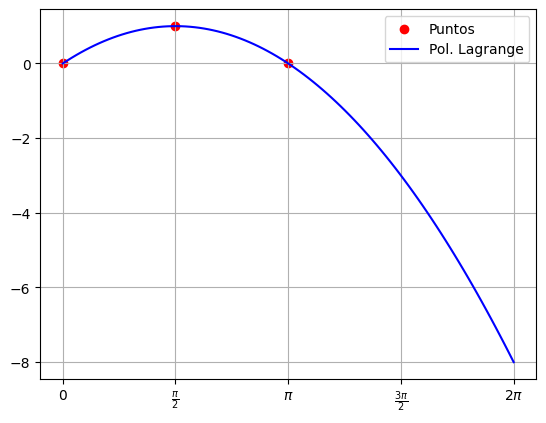


 El polinomio de lagrange para estos puntos es: 
          2
-0.4053 x + 1.273 x


In [2]:
#Aqui va su código
x_array = np.array([0,np.pi/2,np.pi])
y_array = np.array([0,1,0])

pol_lagrange = lagrange(x_array,y_array) #este es el polinomio de lagrange que pasa por los puntos x_0=0, x_1=pi/2, x_2=pi
Pol =  np.poly1d(pol_lagrange)

x_vals = np.linspace(0,2*np.pi,100)

plt.scatter(x_array,y_array, color = 'red', label = 'Puntos')
plt.plot(x_vals,pol_lagrange(x_vals), 'b-', label = 'Pol. Lagrange')
ticks = np.arange(0, 2 * np.pi + np.pi / 2, np.pi / 2)
tick_labels = [r"$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"]
plt.xticks(ticks, tick_labels)

plt.grid()
plt.legend()
plt.show()
print(f'\n El polinomio de lagrange para estos puntos es: \n {Pol}')

#Error:
## n = 3, el error nos quedaría como:

\begin{equation}
\epsilon = \frac{1}{(3+1)!} f^{(3+1)}(\xi)(x - x_0)(x - x_1)(x - x_2)
\end{equation}


In [3]:
x = sp.Symbol('x')
x_0 = 0
x_1 = np.pi/2
x_2 = np.pi
x_i = (x_2 - x_1)/2

f = sp.sin(x)
f_4_prime = sp.diff(f,x,4)
f_4_diff = sp.lambdify(f_4_prime,x)

x_e = 3*np.pi/2

e = (1/ mt.factorial(4)) * f_4_diff(x_e) * (x_i- x_0)*(x_i - x_1)*(x_i - x_2)
e

0.0605591341412106⋅x

# 1b
Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

In [4]:
# n=3, así debemos calcular la octava derivada de f
f_8_prime = sp.diff(f,x,8)
f_8_diff = sp.lambdify(f_8_prime,x)

e_hermite = (1/mt.factorial(8)) * f_8_diff(x_e) * (x_i - x_0)**2 * (x_i - x_1)**2 * (x_i - x_2)**2
e_hermite

5.23915532561877e-5⋅x

# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el error asociado a cada uno de ellos. ¿Cuál será el mejor?

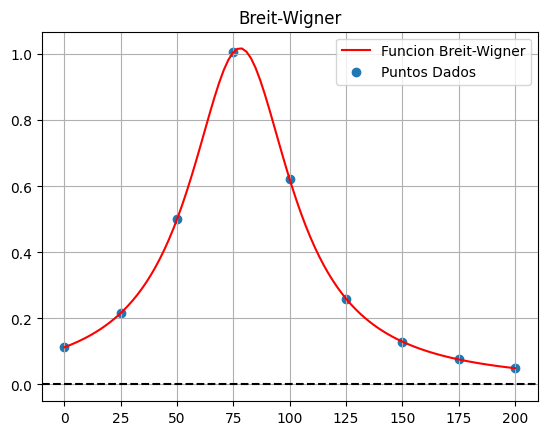

In [5]:
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
E_r = 78
gam = 55
sigma_50 = 0.5 #como no se dan valores para sigma evaluado en una energía se asume un valor arbitrario, en este caso para sigma(E=50)

sigma_0 = sigma_50*((50 - E_r)**2 + (gam/2)**2) # = 770.125

E_vals = np.linspace(0,200,100)
sigma_E = lambda E: sigma_0/((E - E_r)**2 + (gam/2)**2)

plt.title('Breit-Wigner')
plt.plot(E_vals,sigma_E(E_vals), 'r-', label = 'Funcion Breit-Wigner')
plt.scatter(Energia,sigma_E(Energia), label = 'Puntos Dados' )
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.grid()
plt.show()

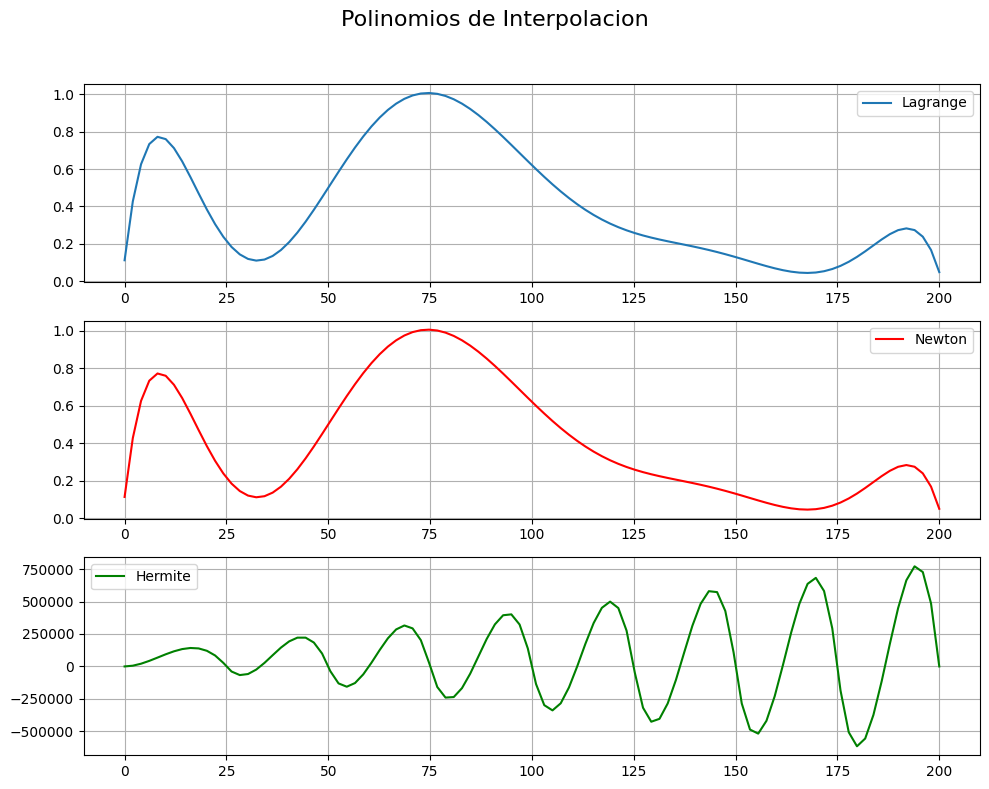

In [6]:
#polinomios lagrange,newton,hermite
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
valores_sigma_E = np.array([sigma_E(i) for i in Energia])

pol_lagrange_BW = lagrange(Energia,valores_sigma_E) #pol lagrange
Pol_BW =  np.poly1d(pol_lagrange_BW)

pol_newton_BW = BarycentricInterpolator(Energia,valores_sigma_E) #pol newton
Pol_new_BW = np.poly1d(pol_newton_BW)


""" Derivada de sigma_E
E = sp.Symbol('E')
gamma = sp.Symbol('\Gamma')
sigma_00 = sp.Symbol('\sigma_0')
E__r = sp.Symbol('E_r')

sig_E = sigma_00/((E - E__r)**2 + (gamma/2)**2)
diff_sig_E = sp.diff(sig_E,E,1)
diff_sig_E"""

diff_sigma_E = lambda E:  sigma_0 * (-2*E + 2*E_r/((gam/2)**2 + (E - E_r)**2 )**2)

diff_vals_sigma_E = np.array ([diff_sigma_E(i) for i in Energia])

pol_hermite_BW = CubicHermiteSpline(Energia,valores_sigma_E,diff_vals_sigma_E) #pol hermite


#graficas de los polinomios
fig, axs = plt.subplots(3,1,figsize=(10, 8))

axs[0].plot(E_vals, pol_lagrange_BW(E_vals), label="Lagrange")
axs[1].plot(E_vals, pol_newton_BW(E_vals),color = 'red', label="Newton")
axs[2].plot(E_vals,pol_hermite_BW(E_vals), color = 'green', label = 'Hermite')
for ax in axs.flat:
    ax.grid(True)
    ax.legend()

fig.suptitle("Polinomios de Interpolacion", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])


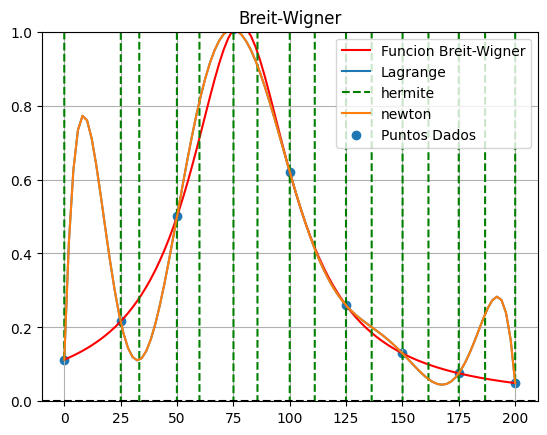

In [7]:
plt.title('Breit-Wigner')
plt.plot(E_vals,sigma_E(E_vals), 'r-', label = 'Funcion Breit-Wigner')
plt.plot(E_vals,pol_lagrange_BW(E_vals), label ='Lagrange')
plt.plot(E_vals,pol_hermite_BW(E_vals), 'g--', label = 'hermite') #este polinomio está re loco
plt.plot(E_vals,pol_newton_BW(E_vals), label = 'newton')
plt.scatter(Energia,sigma_E(Energia), label = 'Puntos Dados' )
plt.axhline(0, color='black', linestyle='--')
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.show()
#los polinomios de lagrange y de newton son practicamente iguales, en la grafica se superponen

'Se evidencia que el que mayor error tiene es la interpolacion de Hermite, mientras que la de Lagrange y Newton tienen errores similares.'

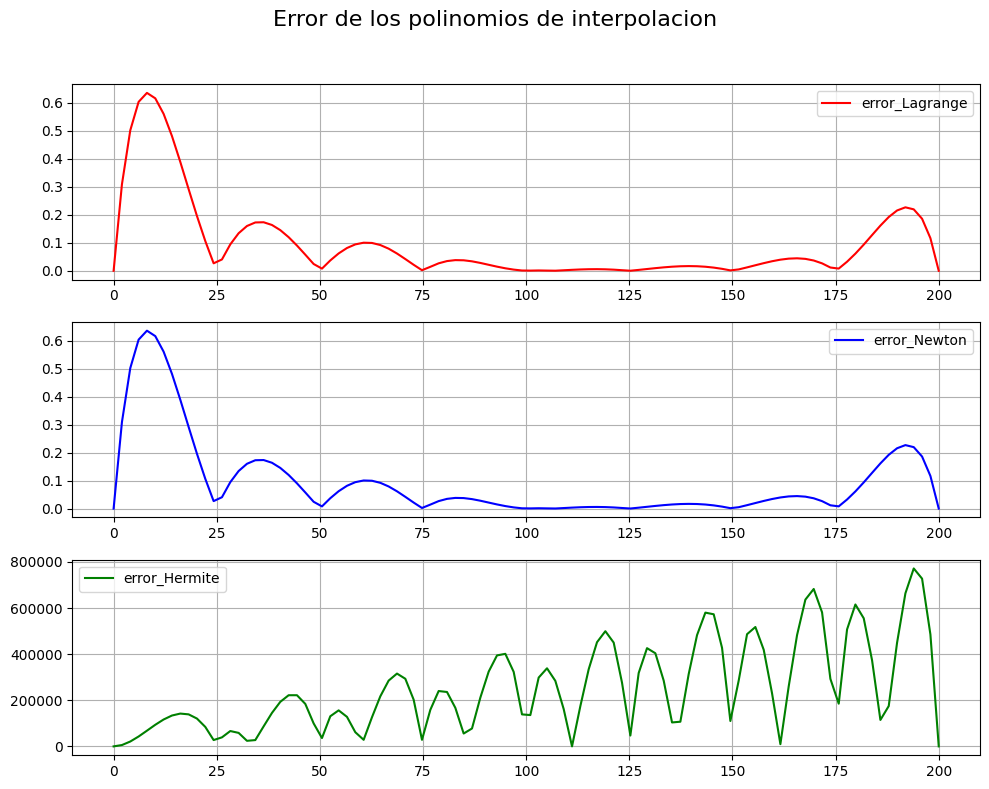

In [8]:
valores_sigma_E_err = sigma_E(E_vals)

error_lagrange = np.abs(valores_sigma_E_err - pol_lagrange_BW(E_vals))
error_newton = np.abs(valores_sigma_E_err - pol_newton_BW(E_vals))
error_hermite = np.abs(valores_sigma_E_err - pol_hermite_BW(E_vals))

fig, axs = plt.subplots(3,1,figsize=(10, 8))

axs[0].plot(E_vals,error_lagrange,color = 'red', label = 'error_Lagrange')
axs[1].plot(E_vals,error_newton,color = 'blue', label = 'error_Newton')
axs[2].plot(E_vals,error_hermite, color = 'green',label = 'error_Hermite')

for ax in axs.flat:
    ax.grid(True)
    ax.legend()

fig.suptitle("Error de los polinomios de interpolacion", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

"""Se evidencia que el que mayor error tiene es la interpolacion de Hermite, mientras que la de Lagrange y Newton tienen errores similares."""

#3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

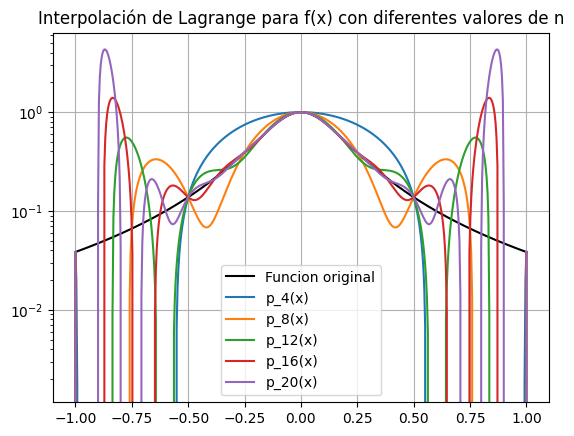

In [9]:
n = np.array([4,8,12,16,20])
f_x = lambda x: 1 / (1 + 25 * x**2)

x_plot = np.linspace(-1,1, 500)

plt.plot(x_plot,f_x(x_plot), color = 'black', label = 'Funcion original')

for n in n:
    x_nodes = np.linspace(-1, 1, n + 1)
    y_nodes = f_x(x_nodes)

    pol_lagrange_f = lagrange(x_nodes, y_nodes)

    p_n_valores = pol_lagrange_f(x_plot)

    plt.plot(x_plot, p_n_valores, label=f"p_{n}(x)")


plt.legend()
plt.title("Interpolación de Lagrange para f(x) con diferentes valores de n")
plt.grid()
plt.yscale('log')
plt.show()

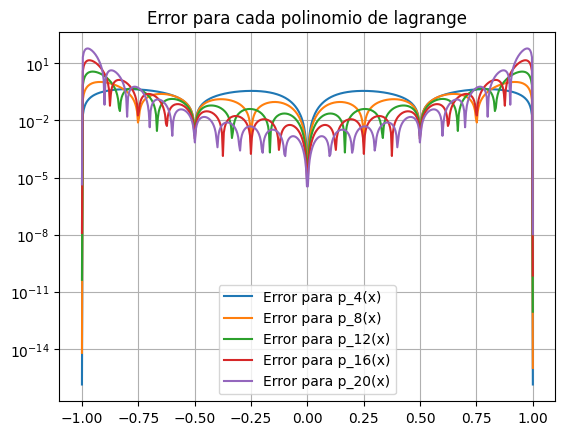


El error evaluado con un n = 4 y en un x = 0.5 es: 0.646550529805696


In [10]:
#error
n = np.array([4,8,12,16,20])
for n in n:
  x_nodes = np.linspace(-1, 1, n+1)
  y_nodes = f_x(x_nodes)
  pol_lagrange_f = lagrange(x_nodes, y_nodes)

  e = np.abs(f_x(x_plot) - pol_lagrange_f(x_plot))
  plt.plot(x_plot,e, label = f'Error para p_{n}(x)')

plt.legend()
plt.title('Error para cada polinomio de lagrange')
plt.grid()
plt.yscale('log')
plt.show()
"""
El error mayor se observa para n = 20 en la grafica, ya que esta es la grafica menos suave de todas, a su vez se ve que a medida que crece n el error aumenta

"""
#----------------------------------error en x = 0.5--------------------------------------
n_4 = 4
x_ev = 0.5
x_error = np.linspace(-1,1,n_4)

x = sp.Symbol('x')
fx_sym = 1 / (1 + 25 * x**2)
diff_fx = sp.diff(fx_sym,x,n_4 + 1)
diff_eval = diff_fx.subs(x,x_ev)

fx_error = diff_eval/mt.factorial(n_4+1)
for i in x_error:
  fx_error *= (x_ev - i)


print(f'\nEl error evaluado con un n = 4 y en un x = 0.5 es: {fx_error}')

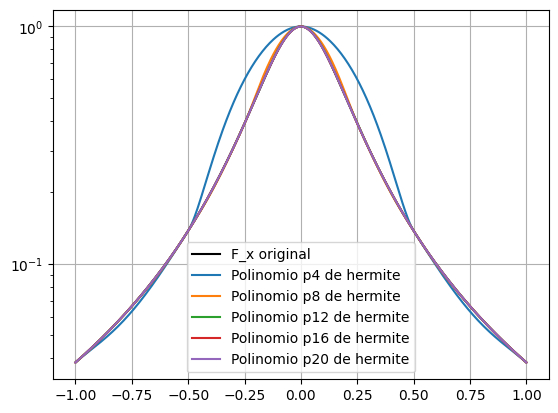

'\nSe puede verificar a simple vista que la interpolacion de hermite es supremamente más precisa para este caso que la interpolacion de lagrange,\nademás viendo la grafica se puede decir que a medida que crece n el polinomio de interpolacion es mejor, contrario al polinomio de lagrange. \n'

In [15]:
#inter de hermite
n = np.array([4,8,12,16,20])
diff_fx_1 = sp.diff(fx_sym,x,1)
diff_fx_1_func = sp.lambdify([x],diff_fx_1)

plt.plot(x_plot,f_x(x_plot), color = 'black', label = 'F_x original')

for n in n:
    x_nodes = np.linspace(-1, 1, n + 1)
    y_nodes = f_x(x_nodes)

    derivada_valores_fx = np.zeros(len(y_nodes))
    derivada_valores_fx= (diff_fx_1_func(x_nodes))

    polinomio_hermite_fx = CubicHermiteSpline(x_nodes, y_nodes,derivada_valores_fx)

    plt.plot(x_plot,polinomio_hermite_fx(x_plot), label = f'Polinomio p{n} de hermite')

plt.grid()
plt.yscale('log')
plt.legend()
plt.show()

"""
Se puede verificar a simple vista que la interpolacion de hermite es supremamente más precisa para este caso que la interpolacion de lagrange,
además viendo la grafica se puede decir que a medida que crece n el polinomio de interpolacion es mejor, contrario al polinomio de lagrange.
"""

# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato.

3. Representar el polinomio de interpolación de Lagrange y de Hermite en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?



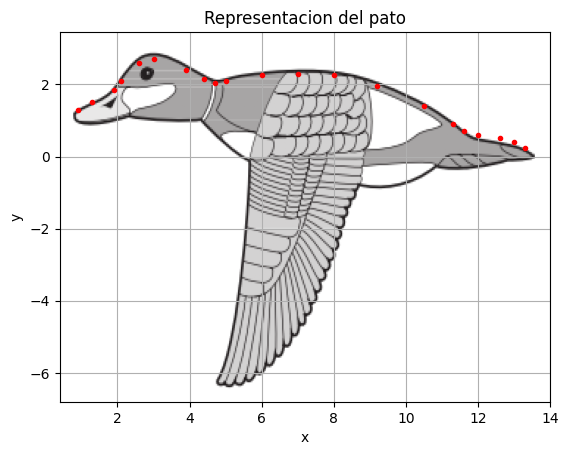

In [12]:
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Decargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# Definimos los puntos del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

# Representamos graficamente al pato y los puntos que definimos para su contorno superior
plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coinsidan con x y y
plt.plot(xp, yp, '.r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

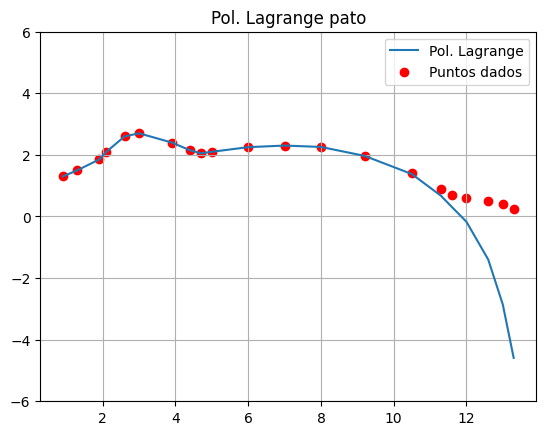

In [63]:
xp_plot = np.linspace(0,15,1000)
pol_lagrange_pato = lagrange(xp,yp)

plt.plot(xp,pol_lagrange_pato(xp), label = 'Pol. Lagrange')
plt.scatter(xp,yp,color = 'red',label = 'Puntos dados')
plt.ylim(-6,6)
plt.title('Pol. Lagrange pato')
plt.legend()
plt.grid()
plt.show()

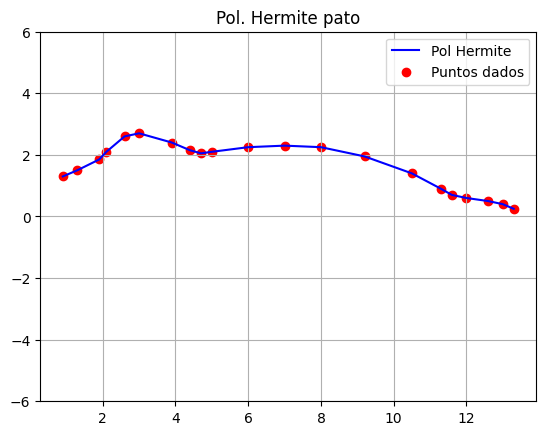

In [65]:
xp_ = np.array([0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3])
yp_ = np.array([1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25])

f_prime_hermite = np.zeros_like(yp_)
for i in range(1, len(xp_) - 1):  # Puntos internos
    f_prime_hermite[i] = (yp_[i+1] - yp_[i]) / (xp_[i+1] - xp_[i])  #aproximacion de los valores de f'(x) usando diferencias finitas

pol_hermite_pato = CubicHermiteSpline(xp_,yp_,f_prime_hermite)

plt.plot(xp_,pol_hermite_pato(xp_), color = 'blue', label = 'Pol Hermite')
plt.scatter(xp_,yp_, color = 'red', label = 'Puntos dados')
plt.title('Pol. Hermite pato')
plt.grid()
plt.ylim(-6,6)
plt.legend()
plt.show()

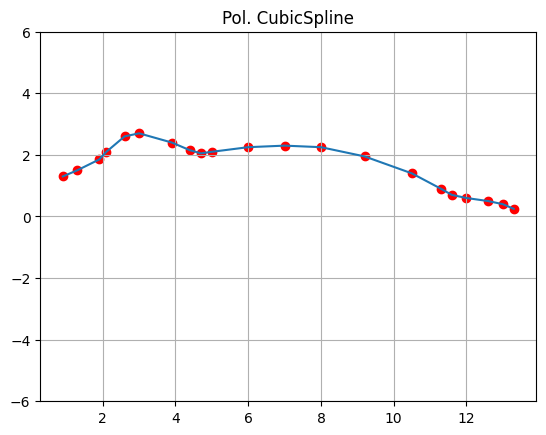

In [74]:
pol_cubic = CubicSpline(xp,yp)

plt.plot(xp,pol_cubic(xp), label = 'Pol cubic')
plt.scatter(xp,yp, color = 'red', label = 'Puntos pato')
plt.title('Pol. CubicSpline')
plt.ylim(-6,6)
plt.grid()

##El polinomio de Lagrange no logra a aproximar suficientemente bien los puntos del pato, pero los metodos de Hermite y de CubicSpline lo hacen de manera muy similar y bien